# kneed -- knee detection in Python

For the purposes of the walkthrough, import `DataGenerator` to create simulated datasets.  
In practice, the `KneeLocator` class will be used to identify the knee point.

In [1]:
%matplotlib inline

from kneed.data_generator import DataGenerator as dg
from kneed.knee_locator import KneeLocator

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
x = [3.07, 3.38, 3.55, 3.68, 3.78, 3.81, 3.85, 3.88, 3.9, 3.93]
y = [0.0, 0.3, 0.47, 0.6, 0.69, 0.78, 0.845, 0.903, 0.95, 1.0]
kl = KneeLocator(x, y, S=1.0, curve='convex', direction='increasing', interp_method='interp1d')

/Users/kevin/projects/kneed/kneed/knee_locator.py:171: UserWarning: No knee/elbow found
  warnings.warn('No knee/elbow found')


In [25]:
kl.x_normalized

array([0.        , 0.03488372, 0.05813953, 0.09302326, 0.13953488,
       0.1744186 , 0.29069767, 0.44186047, 0.63953488, 1.        ])

In [26]:
np.diff(kl.x_normalized).mean()

0.1111111111111111

In [21]:
np.diff(x).mean()

0.09555555555555559

In [12]:
from scipy.signal import argrelextrema

In [16]:
argrelextrema(kl.y_difference, np.greater)

(array([5]),)

In [17]:
argrelextrema(kl.y_difference, np.less)

(array([], dtype=int64),)

In [7]:
kl.y_difference_maxima

array([0.1355814])

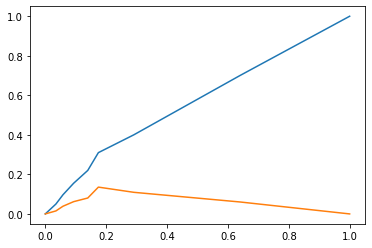

In [6]:
plt.plot(kl.x_normalized, kl.y_normalized);
plt.plot(kl.x_difference, kl.y_difference);

In [2]:
np.random.seed(23) # only for the walkthrough

In [3]:
x,y = dg.noisy_gaussian(N=1000)

In [4]:
x[:5],y[:5]

(array([24.14475503, 24.92443938, 24.93769683, 25.37559952, 25.45830214]),
 array([0.   , 0.001, 0.002, 0.003, 0.004]))

The knee is located by passing `x` and `y` values to `knee_locator`.  
`S` is the sensitivity parameter  
`curve`='concave'

In [5]:
kneedle = KneeLocator(x, y, S=1.0, curve='concave', direction='increasing', interp_method='polynomial')

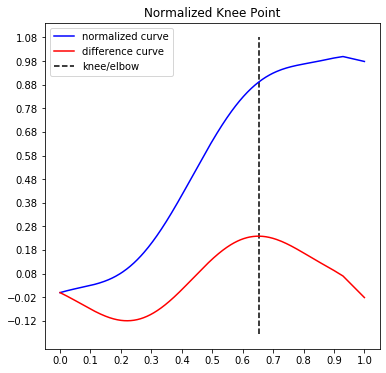

In [6]:
kneedle.plot_knee_normalized()

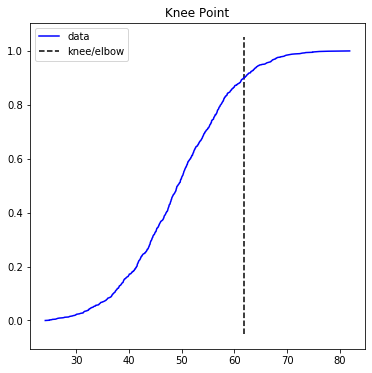

In [7]:
kneedle.plot_knee()

In [8]:
kneedle.knee

61.79633224617477

There are plotting functions to visualize the knee point on the raw data and the normalized data.

## Average Knee for NoisyGaussian from 50 random iterations

In [9]:
knees = []
for i in range(50):
    x,y = dg.noisy_gaussian(N=1000)
    kneedle = KneeLocator(x, y, direction='increasing', curve='concave', interp_method='polynomial')
    knees.append(kneedle.knee)

In [10]:
np.mean(knees)

61.08842395242671

# Test all type of functions

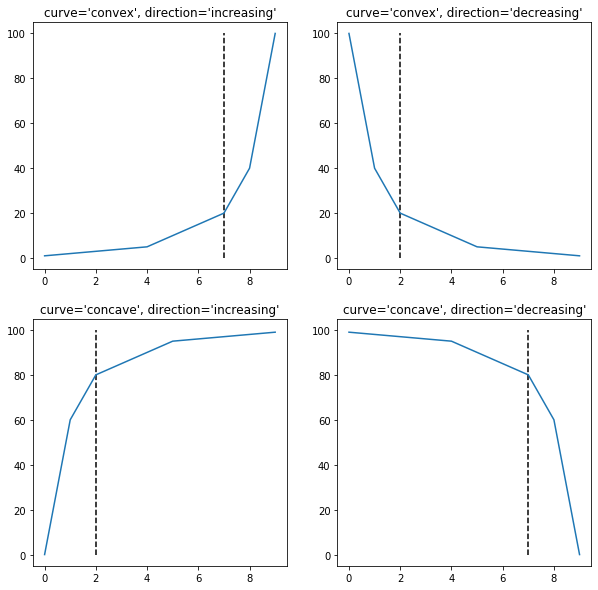

In [11]:
x = np.arange(0,10)
y_convex_inc = np.array([1,2,3,4,5,10,15,20,40,100])
y_convex_dec = y_convex_inc[::-1]
y_concave_dec = 100 - y_convex_inc
y_concave_inc = 100 - y_convex_dec

kn = KneeLocator(x, y_convex_inc, curve='convex')
knee_yconvinc = kn.knee

kn = KneeLocator(x, y_convex_dec, curve='convex', direction='decreasing')
knee_yconvdec = kn.knee

kn = KneeLocator(x, y_concave_inc, curve='concave')
knee_yconcinc = kn.knee

kn = KneeLocator(x, y_concave_dec, curve='concave', direction='decreasing')
knee_yconcdec = kn.knee

f, axes = plt.subplots(2, 2, figsize=(10,10));
yconvinc = axes[0][0]
yconvdec = axes[0][1]
yconcinc = axes[1][0]
yconcdec = axes[1][1]

sns.lineplot(x, y_convex_inc, ax=axes[0][0])
yconvinc.vlines(x=knee_yconvinc, ymin=0, ymax=100, linestyle='--')
yconvinc.set_title("curve='convex', direction='increasing'")

sns.lineplot(x, y_convex_dec, ax=axes[0][1])
yconvdec.vlines(x=knee_yconvdec, ymin=0, ymax=100, linestyle='--')
yconvdec.set_title("curve='convex', direction='decreasing'")

sns.lineplot(x, y_concave_inc, ax=axes[1][0])
yconcinc.vlines(x=knee_yconcinc, ymin=0, ymax=100, linestyle='--')
yconcinc.set_title("curve='concave', direction='increasing'")

sns.lineplot(x, y_concave_dec, ax=axes[1][1])
yconcdec.vlines(x=knee_yconcdec, ymin=0, ymax=100, linestyle='--')
yconcdec.set_title("curve='concave', direction='decreasing'");

# Polynomial line fit

An example of a "bumpy" line where the traditional `interp1d` spline fitting method does not provide the best estimate for the point of maximum curvature.  
We demonstrate that setting the parameter `interp_method='polynomial'` will choose the right point by smoothing the line.

In [12]:
x = list(range(90))
y = [
    7304.99, 6978.98, 6666.61, 6463.2, 6326.53, 6048.79, 6032.79, 5762.01, 5742.77,
    5398.22, 5256.84, 5226.98, 5001.72, 4941.98, 4854.24, 4734.61, 4558.75, 4491.1,
    4411.61, 4333.01, 4234.63, 4139.1, 4056.8, 4022.49, 3867.96, 3808.27, 3745.27,
    3692.34, 3645.55, 3618.28, 3574.26, 3504.31, 3452.44, 3401.2, 3382.37, 3340.67,
    3301.08, 3247.59, 3190.27, 3179.99, 3154.24, 3089.54, 3045.62, 2988.99, 2993.61,
    2941.35, 2875.6, 2866.33, 2834.12, 2785.15, 2759.65, 2763.2, 2720.14, 2660.14,
    2690.22, 2635.71, 2632.92, 2574.63, 2555.97, 2545.72, 2513.38, 2491.57, 2496.05,
    2466.45, 2442.72, 2420.53, 2381.54, 2388.09, 2340.61, 2335.03, 2318.93, 2319.05,
    2308.23, 2262.23, 2235.78, 2259.27, 2221.05, 2202.69, 2184.29, 2170.07, 2160.05,
    2127.68, 2134.73, 2101.96, 2101.44, 2066.4, 2074.25, 2063.68, 2048.12, 2031.87
]

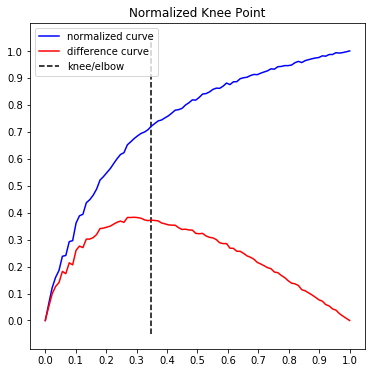

In [13]:
kneedle = KneeLocator(x, y, S=1.0, curve='convex', direction='decreasing')
kneedle.plot_knee_normalized()

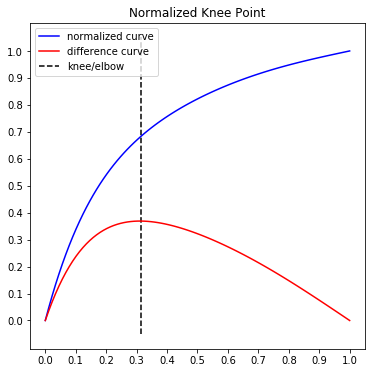

In [14]:
kneedle = KneeLocator(x, y, S=1.0, curve='convex', direction='decreasing', interp_method='polynomial')
kneedle.plot_knee_normalized()